ライブラリのインポート

In [133]:
%reload_ext autoreload
%autoreload
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from my_regression import my_linear_regression

データの読み込みｋ

In [134]:
X = pd.read_excel("data.xlsx", index_col = 0)

for idx in range(len(X)):
    if np.random.random() < 0.3:
        X.at[idx, "u"] = np.nan
display(X)

,x,y,z,u,v,dummy1,dummy2
0,1.880670,5.119414,-3.171900,0.639825,-4.229670,D,d
1,-0.522854,-6.839106,-0.301561,-1.629397,2.455704,J,a
2,2.022402,-0.413710,-0.918374,NaN,0.870053,I,a
3,0.426285,1.731233,-2.399366,-0.715397,-0.749180,B,a
4,3.117020,-3.601585,2.562953,-5.160408,0.209371,C,b
...,...,...,...,...,...,...,...
995,-0.563727,-2.526431,0.489600,-4.106001,4.380324,H,a
996,1.749643,-1.628650,-1.726381,-0.474737,-1.261273,F,d
997,3.272143,1.122671,-0.930049,NaN,-4.958666,E,d
998,1.648471,-0.658811,-0.561886,-1.318114,-2.546939,F,b


欠損値の削除とダミー変数処理

In [135]:
model = my_linear_regression(X, subset = ["u"], file = "hoge.xlsx")
# 順序構造を記述したリスト，データはこの中の一部の値しか持っていないかもしれない
dummy1_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
model.get_dummies("dummy1", dummy1_full_list, dummy_drop = "A")
dummy2_list = ["a", "b", "c", "d"]
model.get_dummies("dummy2", dummy2_full_list, dummy_drop = "a")

dummy1のみで回帰

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      u   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     60.97
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           4.30e-94
Time:                        23:18:03   Log-Likelihood:                -1542.2
No. Observations:                 701   AIC:                             3108.
Df Residuals:                     689   BIC:                             3163.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.781     -0.073      0.942      -1.590       1.476
x             -0.6534      0.034    -19.091      0.000      -0.721      -0.586
y              0.3322      0.026     12.968      0.000       0.282       0.382
B             -0.6257      0.911     -0.687      0.493      -2.415       1.164
C             -0.7151      0.805     -0.888      0.375      -2.296       0.866
D             -0.7307      0.802     -0.911      0.362      -2.305       0.844
E             -0.4675      0.862     -0.542      0.588      -2.160       1.225
F             -0.9862      0.825     -1.195      0.232      -2.606       0.634
G             -0.8794      0.832     -1.057      0.291      -2.513       0.754
H             -1.0471      0.833     -1.257      0.209      -2.682       0.588
I             -0.8237      0.810     -1.017      0.310      -2.415       0.767
J             -0.9290      0.815     -1.140      0.255      -2.529       0.671
==============================================================================
Omnibus:                        5.946   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.927
Skew:                          -0.225   Prob(JB):                       0.0516
Kurtosis:                       3.013   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 10.,  22.,  58., 124., 160., 140., 108.,  60.,  13.,   6.]),
 array([-9.81377453, -8.01380408, -6.21383364, -4.4138632 , -2.61389276,
        -0.81392231,  0.98604813,  2.78601857,  4.58598902,  6.38595946,
         8.1859299 ]),
 <BarContainer object of 10 artists>)

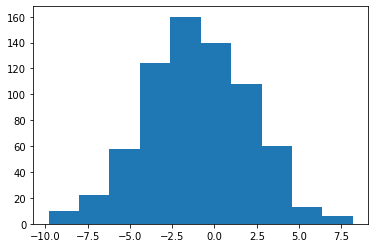

In [138]:
model.fit("u", ["x", "y"], dummy_list = ["dummy1"])
model.save("with_dummy1")
model.predict()
plt.hist(X["u"])

In [130]:
model.fit("u", ["x", "y"], dummy_list = ["dummy2"])
model.save("with_dummy2")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      u   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          6.76e-106
Time:                        23:15:22   Log-Likelihood:                -1501.2
No. Observations:                 686   AIC:                             3014.
Df Residuals:                     680   BIC:                             3042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8285      0.141     -5.856      0.000      -1.106      -0.551
x             -0.6861      0.034    -20.307      0.000      -0.752      -0.620
y              0.3403      0.025     13.704      0.000       0.292       0.389
b             -0.6371      0.215     -2.969      0.003      -1.058      -0.216
c              0.3083      0.268      1.151      0.250      -0.218       0.834
d              0.0443      0.215      0.206      0.837      -0.379       0.467
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.822
Skew:                          -0.168   Prob(JB):                        0.148
Kurtosis:                       2.857   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""